In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_checks = pd.read_csv('./lentahack/20210518_checks.csv')
df_uplift = pd.read_csv('./lentahack/20210518_uplift.csv')
df_sample_submission = pd.read_csv('./lentahack/20210521_sample_submission.csv')
df_hierarchy = pd.read_csv('./lentahack/20210518_hierarchy.csv')
df_offers = pd.read_csv('./lentahack/20210521_offers.csv')
data = pd.read_csv('data.csv')

In [3]:
data

,Offer_ID,number_of_products,diversity_1,diversity_2,diversity_3,diversity_4,duration,promotype,uplift,most_freq_1,most_freq_2,most_freq_3,most_freq_4,train_test_group,pct_change
0,10,8,0.0,0.0,0.000000,0.000000,13,1.0,15.941591,1.0,21.0,191.0,515.0,train,0.531065
1,100,12,0.0,0.0,0.000000,1.418296,13,3.0,NaN,0.0,56.0,45.0,1103.0,test,-0.040186
2,101,1,0.0,0.0,0.000000,0.000000,13,3.0,1.761594,1.0,27.0,107.0,951.0,train,0.460020
3,102,11,0.0,0.0,0.000000,0.000000,13,3.0,0.630470,1.0,26.0,31.0,1790.0,train,1.115112
4,103,1,0.0,0.0,0.000000,0.000000,13,3.0,2.505152,1.0,33.0,136.0,1766.0,train,0.243666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,F95,1,0.0,0.0,0.000000,0.000000,6,2.0,2.169574,1.0,28.0,14.0,868.0,train,0.227658
885,F96,22,0.0,0.0,0.000000,3.174674,6,2.0,0.401636,1.0,49.0,333.0,1888.0,train,0.372452
886,F97,14,0.0,0.0,0.000000,0.985228,6,2.0,2.276210,1.0,17.0,362.0,948.0,train,1.158110
887,F98,3,0.0,0.0,0.918296,0.918296,6,2.0,1.593010,1.0,23.0,334.0,769.0,train,0.083164


In [22]:
data.corr()['uplift'][:]

number_of_products   -0.164463
diversity_1                NaN
diversity_2          -0.047745
diversity_3          -0.208449
diversity_4          -0.161514
duration              0.148573
promotype            -0.066285
uplift                1.000000
most_freq_1           0.037855
most_freq_2          -0.305360
most_freq_3           0.111370
most_freq_4           0.007339
pct_change            0.140791
Name: uplift, dtype: float64

In [5]:
df_type = data[['promotype','uplift']].dropna()
df_type['promotype'].value_counts()

1.0    231
3.0    211
2.0    200
0.0     98
Name: promotype, dtype: int64

In [6]:
promo_types = ['Billboards', 'Biweekly', 'Facades', 'Seasonal']
for i in range(4):
    print('Average uplift for ' + promo_types[i] + ' is '+ str(df_type[df_type['promotype']==i]['uplift'].mean()))

Average uplift for Billboards is 4.095095937861225
Average uplift for Biweekly is 7.96843008624632
Average uplift for Facades is 3.6273446738960002
Average uplift for Seasonal is 5.3769963715895726


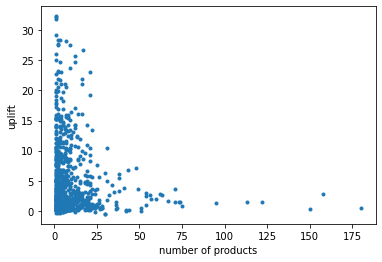

In [7]:
df_number = data[['number_of_products','uplift']].dropna()
# print(df_number['number_of_products'].value_counts())
plt.xlabel('number of products')
plt.ylabel('uplift')
plt.plot(df_number['number_of_products'].values,df_number['uplift'].values,'.')

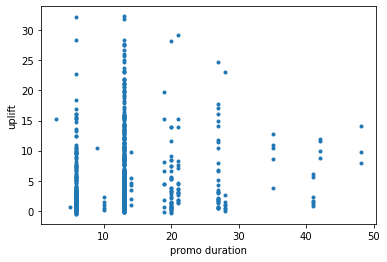

In [11]:
df_duration = data[['duration','uplift']].dropna()
# print(df_duration['duration'].value_counts())
plt.xlabel('promo duration')
plt.ylabel('uplift')
plt.plot(df_duration['duration'].values,df_duration['uplift'].values,'.')

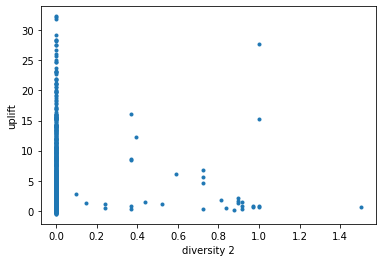

In [13]:
df_h2 = data[['diversity_2','uplift']].dropna()
# print(df_h2['diversity_2'].value_counts())
plt.xlabel('diversity 2')
plt.ylabel('uplift')
plt.plot(df_h2['diversity_2'].values,df_h2['uplift'].values,'.')

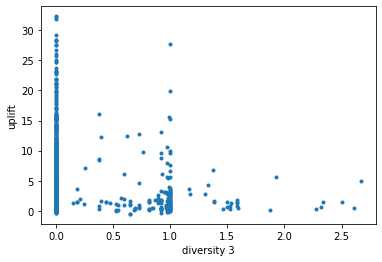

In [14]:
df_h3 = data[['diversity_3','uplift']].dropna()
# print(df_h3['diversity_3'].value_counts())
plt.xlabel('diversity 3')
plt.ylabel('uplift')
plt.plot(df_h3['diversity_3'].values,df_h3['uplift'].values,'.')

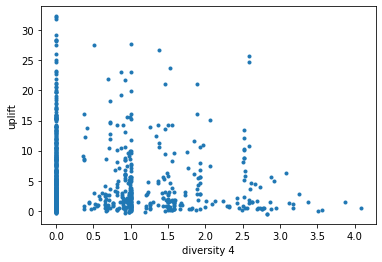

In [15]:
df_h4 = data[['diversity_4','uplift']].dropna()
# print(df_h4['diversity_4'].value_counts())
plt.xlabel('diversity 4')
plt.ylabel('uplift')
plt.plot(df_h4['diversity_4'].values,df_h4['uplift'].values,'.')

In [24]:
df = pd.read_csv('offer_sku.csv',index_col=False)
df

/anaconda/envs/py38_default/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Promo_type,Offer_ID,sku,start_date,end_date,train_test_group,day,check_id,promo_id,num_sales,supplier_price,selling_price,UpLift
0,Facades,F26,71c770923102af052f64c6036c9dd590,2020-02-13,2020-02-19,train,2020-02-15,ea9ef46e49abd4aeb22a1a4854ef4db8,dfe766bb394e01da9a64f6bfa74c978e,1.0,21.49,29.99,0.430811
1,Facades,F26,71c770923102af052f64c6036c9dd590,2020-02-13,2020-02-19,train,2020-02-15,bca2ec0f3522f6dd73661e7e30ac53b4,dfe766bb394e01da9a64f6bfa74c978e,1.0,21.96,29.01,0.430811
2,Facades,F26,71c770923102af052f64c6036c9dd590,2020-02-13,2020-02-19,train,2020-02-15,cd05aa5d30b7597bc3f7d8a283f41dbd,dfe766bb394e01da9a64f6bfa74c978e,1.0,21.75,29.99,0.430811
3,Facades,F26,71c770923102af052f64c6036c9dd590,2020-02-13,2020-02-19,train,2020-02-15,7eaa330eabe7dd554c24940df08de667,dfe766bb394e01da9a64f6bfa74c978e,2.0,42.57,59.98,0.430811
4,Facades,F26,71c770923102af052f64c6036c9dd590,2020-02-13,2020-02-19,train,2020-02-15,9642d16f8129fc3efa4a2a7eba98a1bd,dfe766bb394e01da9a64f6bfa74c978e,1.0,21.75,29.99,0.430811
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1148581,Biweekly,687,0d73ba0d16f74777b696657bf69a9ef0,2019-11-14,2019-11-27,train,2019-11-18,a0a1335d5a06f726f25b88526f29e6c6,62ee8f6806e64bb1e08c2bfc73cce473,1.0,41.00,68.89,5.097561
1148582,Biweekly,687,0d73ba0d16f74777b696657bf69a9ef0,2019-11-14,2019-11-27,train,2019-11-18,c88e4f544e606ecb6647181ff07768d6,62ee8f6806e64bb1e08c2bfc73cce473,1.0,40.95,68.23,5.097561
1148583,Biweekly,687,0d73ba0d16f74777b696657bf69a9ef0,2019-11-14,2019-11-27,train,2019-11-18,279d08cddabb95c98572048656d6f307,62ee8f6806e64bb1e08c2bfc73cce473,1.0,41.30,68.22,5.097561
1148584,Biweekly,687,0d73ba0d16f74777b696657bf69a9ef0,2019-11-14,2019-11-27,train,2019-11-18,eb8b9be8ffdcd530a708f052f83e3c11,62ee8f6806e64bb1e08c2bfc73cce473,1.0,41.30,68.89,5.097561


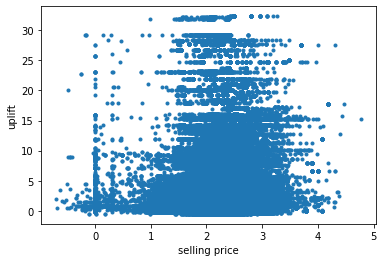

In [30]:
df_price = df[['selling_price','UpLift']].dropna()
df_price['selling_price'] = df_price['selling_price'].apply(lambda x: np.log10(x))
plt.xlabel('selling price')
plt.ylabel('uplift')
plt.plot(df_price['selling_price'].values,df_price['UpLift'].values,'.')

In [42]:
periods = df
seasons = []

for i,v in enumerate(df['start_date'].values):
    if v[5:7] == '01' or v[5:7] == '02' or v[5:7] == '12':
        seasons.append(0)
    elif v[5:7] == '03' or v[5:7] == '04' or v[5:7] == '05':
        seasons.append(1)
    elif v[5:7] == '06' or v[5:7] == '07' or v[5:7] == '08':
        seasons.append(2)
    elif v[5:7] == '09' or v[5:7] == '10' or v[5:7] == '11':
        seasons.append(3)
        
periods['season'] = seasons
periods

,Promo_type,Offer_ID,sku,start_date,end_date,train_test_group,day,check_id,promo_id,num_sales,supplier_price,selling_price,UpLift,season
0,Facades,F26,71c770923102af052f64c6036c9dd590,2020-02-13,2020-02-19,train,2020-02-15,ea9ef46e49abd4aeb22a1a4854ef4db8,dfe766bb394e01da9a64f6bfa74c978e,1.0,21.49,29.99,0.430811,0
1,Facades,F26,71c770923102af052f64c6036c9dd590,2020-02-13,2020-02-19,train,2020-02-15,bca2ec0f3522f6dd73661e7e30ac53b4,dfe766bb394e01da9a64f6bfa74c978e,1.0,21.96,29.01,0.430811,0
2,Facades,F26,71c770923102af052f64c6036c9dd590,2020-02-13,2020-02-19,train,2020-02-15,cd05aa5d30b7597bc3f7d8a283f41dbd,dfe766bb394e01da9a64f6bfa74c978e,1.0,21.75,29.99,0.430811,0
3,Facades,F26,71c770923102af052f64c6036c9dd590,2020-02-13,2020-02-19,train,2020-02-15,7eaa330eabe7dd554c24940df08de667,dfe766bb394e01da9a64f6bfa74c978e,2.0,42.57,59.98,0.430811,0
4,Facades,F26,71c770923102af052f64c6036c9dd590,2020-02-13,2020-02-19,train,2020-02-15,9642d16f8129fc3efa4a2a7eba98a1bd,dfe766bb394e01da9a64f6bfa74c978e,1.0,21.75,29.99,0.430811,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1148581,Biweekly,687,0d73ba0d16f74777b696657bf69a9ef0,2019-11-14,2019-11-27,train,2019-11-18,a0a1335d5a06f726f25b88526f29e6c6,62ee8f6806e64bb1e08c2bfc73cce473,1.0,41.00,68.89,5.097561,3
1148582,Biweekly,687,0d73ba0d16f74777b696657bf69a9ef0,2019-11-14,2019-11-27,train,2019-11-18,c88e4f544e606ecb6647181ff07768d6,62ee8f6806e64bb1e08c2bfc73cce473,1.0,40.95,68.23,5.097561,3
1148583,Biweekly,687,0d73ba0d16f74777b696657bf69a9ef0,2019-11-14,2019-11-27,train,2019-11-18,279d08cddabb95c98572048656d6f307,62ee8f6806e64bb1e08c2bfc73cce473,1.0,41.30,68.22,5.097561,3
1148584,Biweekly,687,0d73ba0d16f74777b696657bf69a9ef0,2019-11-14,2019-11-27,train,2019-11-18,eb8b9be8ffdcd530a708f052f83e3c11,62ee8f6806e64bb1e08c2bfc73cce473,1.0,41.30,68.89,5.097561,3


In [43]:
seaaasons = ['Winter', 'Spring', 'Summer', 'Autumn']
for i in range(4):
    print('Average uplift for ' + seaaasons[i] + ' is '+ str(periods[periods['season']==i]['UpLift'].mean()))

Average uplift for Winter is 5.386186496047622
Average uplift for Spring is 4.831853848004919
Average uplift for Summer is 4.149496299741877
Average uplift for Autumn is 6.279854053310896


In [44]:
hierarchy = pd.read_csv('hierarchy.csv')
hierarchy

/anaconda/envs/py38_default/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Promo_type,Offer_ID,sku,start_date,end_date,train_test_group,day,check_id,promo_id,num_sales,supplier_price,selling_price,UpLift,hierarchy_level1,hierarchy_level2,hierarchy_level3,hierarchy_level4
0,Facades,F26,71c770923102af052f64c6036c9dd590,2020-02-13,2020-02-19,train,2020-02-15,ea9ef46e49abd4aeb22a1a4854ef4db8,dfe766bb394e01da9a64f6bfa74c978e,1.0,21.49,29.99,0.430811,44a7b825383402ed937a15fb8a5bb12a,a5771bce93e200c36f7cd9dfd0e5deaa,37968ad196a5085f5ed91e58df8c2cef,4bc9b0056ab9c25ecd8794e2cdac48ad
1,Facades,F26,71c770923102af052f64c6036c9dd590,2020-02-13,2020-02-19,train,2020-02-15,bca2ec0f3522f6dd73661e7e30ac53b4,dfe766bb394e01da9a64f6bfa74c978e,1.0,21.96,29.01,0.430811,44a7b825383402ed937a15fb8a5bb12a,a5771bce93e200c36f7cd9dfd0e5deaa,37968ad196a5085f5ed91e58df8c2cef,4bc9b0056ab9c25ecd8794e2cdac48ad
2,Facades,F26,71c770923102af052f64c6036c9dd590,2020-02-13,2020-02-19,train,2020-02-15,cd05aa5d30b7597bc3f7d8a283f41dbd,dfe766bb394e01da9a64f6bfa74c978e,1.0,21.75,29.99,0.430811,44a7b825383402ed937a15fb8a5bb12a,a5771bce93e200c36f7cd9dfd0e5deaa,37968ad196a5085f5ed91e58df8c2cef,4bc9b0056ab9c25ecd8794e2cdac48ad
3,Facades,F26,71c770923102af052f64c6036c9dd590,2020-02-13,2020-02-19,train,2020-02-15,7eaa330eabe7dd554c24940df08de667,dfe766bb394e01da9a64f6bfa74c978e,2.0,42.57,59.98,0.430811,44a7b825383402ed937a15fb8a5bb12a,a5771bce93e200c36f7cd9dfd0e5deaa,37968ad196a5085f5ed91e58df8c2cef,4bc9b0056ab9c25ecd8794e2cdac48ad
4,Facades,F26,71c770923102af052f64c6036c9dd590,2020-02-13,2020-02-19,train,2020-02-15,9642d16f8129fc3efa4a2a7eba98a1bd,dfe766bb394e01da9a64f6bfa74c978e,1.0,21.75,29.99,0.430811,44a7b825383402ed937a15fb8a5bb12a,a5771bce93e200c36f7cd9dfd0e5deaa,37968ad196a5085f5ed91e58df8c2cef,4bc9b0056ab9c25ecd8794e2cdac48ad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1148581,Biweekly,687,0d73ba0d16f74777b696657bf69a9ef0,2019-11-14,2019-11-27,train,2019-11-18,a0a1335d5a06f726f25b88526f29e6c6,62ee8f6806e64bb1e08c2bfc73cce473,1.0,41.00,68.89,5.097561,cc9284597026dcc021735c0970ca0c93,c16a5320fa475530d9583c34fd356ef5,62f91ce9b820a491ee78c108636db089,508648865001185b6a704e553c44b0d7
1148582,Biweekly,687,0d73ba0d16f74777b696657bf69a9ef0,2019-11-14,2019-11-27,train,2019-11-18,c88e4f544e606ecb6647181ff07768d6,62ee8f6806e64bb1e08c2bfc73cce473,1.0,40.95,68.23,5.097561,cc9284597026dcc021735c0970ca0c93,c16a5320fa475530d9583c34fd356ef5,62f91ce9b820a491ee78c108636db089,508648865001185b6a704e553c44b0d7
1148583,Biweekly,687,0d73ba0d16f74777b696657bf69a9ef0,2019-11-14,2019-11-27,train,2019-11-18,279d08cddabb95c98572048656d6f307,62ee8f6806e64bb1e08c2bfc73cce473,1.0,41.30,68.22,5.097561,cc9284597026dcc021735c0970ca0c93,c16a5320fa475530d9583c34fd356ef5,62f91ce9b820a491ee78c108636db089,508648865001185b6a704e553c44b0d7
1148584,Biweekly,687,0d73ba0d16f74777b696657bf69a9ef0,2019-11-14,2019-11-27,train,2019-11-18,eb8b9be8ffdcd530a708f052f83e3c11,62ee8f6806e64bb1e08c2bfc73cce473,1.0,41.30,68.89,5.097561,cc9284597026dcc021735c0970ca0c93,c16a5320fa475530d9583c34fd356ef5,62f91ce9b820a491ee78c108636db089,508648865001185b6a704e553c44b0d7
